In [30]:
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류 알고리즘
import pandas as pd

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

1 closed world 분류

In [31]:
# monitored dataset 불러오기 -> 유미가 보낸 csv? 에다가 해당되는class label도 같이 나오게 csv 새로 받아야할
monitored=pd.read_csv("C:/Users/jain5/Desktop/dataset.csv")
monitored.head()
     

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,0
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,0
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,0
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,0
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,0


In [32]:
# 정답값 아닌 애들 분리
X= monitored.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = monitored['y']

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1)

In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24], 
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# 튜닝 시간 절약을 위해 n_estimators는 100, cv는 2로만 성정한다.
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.7203


In [35]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=24, min_samples_leaf=1, 
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.7661


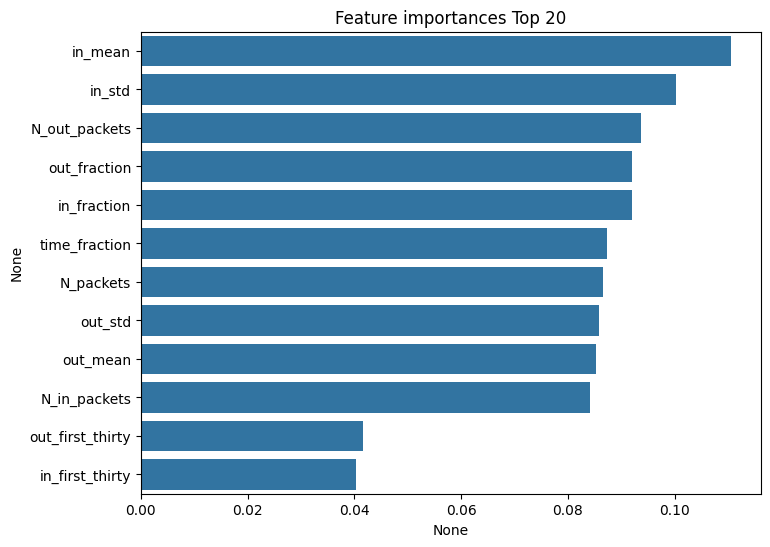

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature_importances_를 이용해 알고리즘이 선택한 피처릐 중요도 알기
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

2-1 open world 이진 분류

In [41]:
un_monitored_bi=pd.read_csv(r"C:/Users/jain5/Desktop/open_binary.csv")
un_monitored_bi.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,1
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,1
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,1
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,1


In [42]:
# 정답값 아닌 애들 분리
X= un_monitored_bi.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = un_monitored_bi['y']     

X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1)

In [43]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24], 
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# 튜닝 시간 절약을 위해 n_estimators는 100, cv는 2로만 성정한다.
rf_clf_bi = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv_bi = GridSearchCV(rf_clf_bi , param_grid=params , cv=2, n_jobs=-1 )
grid_cv_bi.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv_bi.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_bi.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.8265


In [44]:
rf_clf2 = RandomForestClassifier(n_estimators=100, max_depth=24, min_samples_leaf=1, 
                                 min_samples_split=2, random_state=0)
rf_clf2.fit(X_train , y_train)
pred = rf_clf2.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8434


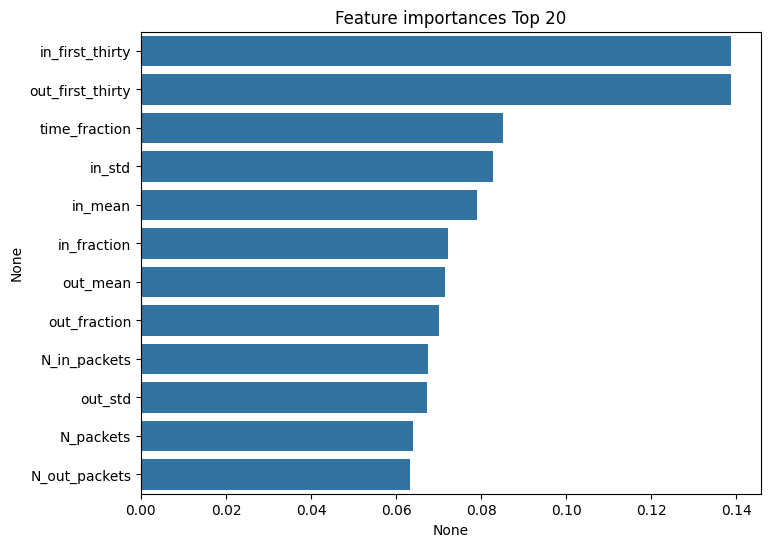

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature_importances_를 이용해 알고리즘이 선택한 피처릐 중요도 알기
ftr_importances_values = rf_clf2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

2-2 open world multi 분류

In [46]:
un_monitored_mul=pd.read_csv(r"C:/Users/jain5/Desktop/open_multi.csv")
un_monitored_mul.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,0
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,0
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,0
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,0
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,0


In [47]:
# 정답값 아닌 애들 분리
X= monitored.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = monitored['y']

X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1)

In [48]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24], 
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# 튜닝 시간 절약을 위해 n_estimators는 100, cv는 2로만 성정한다.
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.7203


In [49]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=24, min_samples_leaf=1, 
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.7661


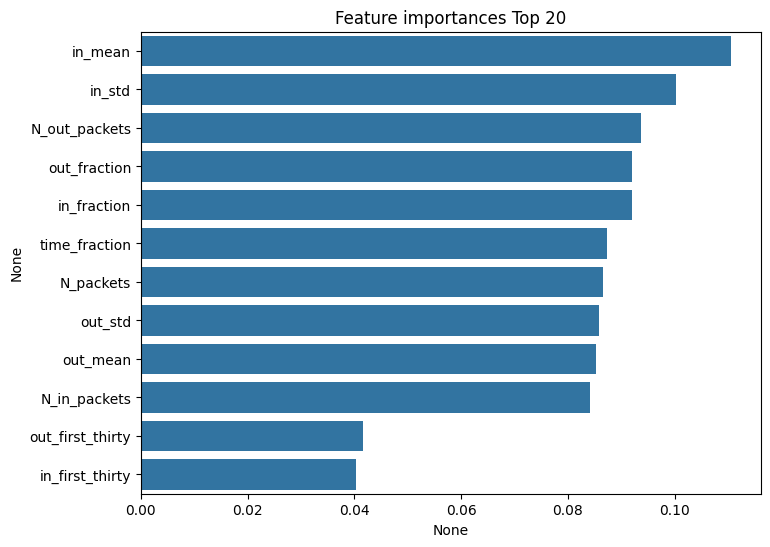

<Figure size 640x480 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature_importances_를 이용해 알고리즘이 선택한 피처릐 중요도 알기
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')